## Problema

- Identificar quais são os melhores indicadores para realizar o recrutamento profissional

## Base de dados
- Este conjunto de dados consiste em algumas características como: percentual de ensino médio, superior e especialização, experiência de trabalho e ofertas salariais para os profissionais colocados.

## Anotações
- ssc_p: Percentual de notas no ensino médio (Secondary School Certificate). Representa o desempenho acadêmico do candidato no nível escolar básico.
- hsc_p: Percentual de notas no ensino médio avançado (Higher Secondary Certificate). Refere-se ao desempenho acadêmico em um nível mais avançado, geralmente equivalente ao ensino médio completo.
- degree_p: Percentual de notas no curso de graduação (Degree Percentage). Indica o desempenho acadêmico do candidato durante a graduação.
- mba_p: Percentual de notas no curso de MBA (Master of Business Administration). Refere-se ao desempenho acadêmico do candidato em um programa de MBA, caso ele tenha cursado.

In [323]:
import pandas as pd
import seaborn as sb
import matplotlib.pyplot as plt
from sklearn.preprocessing import OneHotEncoder, LabelEncoder

In [324]:
dataset = pd.read_excel('./datasets/Recrutamento.xlsx')
dataset.head()

,sl_no,gender,ssc_p,ssc_b,hsc_p,hsc_b,hsc_s,degree_p,degree_t,workex,etest_p,specialisation,mba_p,status,salary
0,1,M,67.00,Others,91.00,Others,Commerce,58.00,Sci&Tech,No,55.0,Mkt&HR,58.80,Yes,270000.0
1,2,M,79.33,Central,78.33,Others,Science,77.48,Sci&Tech,Yes,86.5,Mkt&Fin,66.28,Yes,200000.0
2,3,M,65.00,Central,68.00,Central,Arts,64.00,Comm&Mgmt,No,75.0,Mkt&Fin,57.80,Yes,250000.0
3,4,M,56.00,Central,52.00,Central,Science,52.00,Sci&Tech,No,66.0,Mkt&HR,59.43,No,NaN
4,5,M,85.80,Central,73.60,Central,Commerce,73.30,Comm&Mgmt,No,96.8,Mkt&Fin,55.50,Yes,425000.0


In [325]:
dataset.shape

(215, 15)

In [326]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 215 entries, 0 to 214
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   sl_no           215 non-null    int64  
 1   gender          215 non-null    object 
 2   ssc_p           215 non-null    float64
 3   ssc_b           215 non-null    object 
 4   hsc_p           215 non-null    float64
 5   hsc_b           215 non-null    object 
 6   hsc_s           215 non-null    object 
 7   degree_p        215 non-null    float64
 8   degree_t        215 non-null    object 
 9   workex          215 non-null    object 
 10  etest_p         215 non-null    float64
 11  specialisation  215 non-null    object 
 12  mba_p           215 non-null    float64
 13  status          215 non-null    object 
 14  salary          148 non-null    float64
dtypes: float64(6), int64(1), object(8)
memory usage: 25.3+ KB


A variável salary contém um total de 67 registros nulos

In [327]:
dataset_with_null_salary = dataset[dataset['salary'].isnull()]
dataset_with_null_salary.head()

,sl_no,gender,ssc_p,ssc_b,hsc_p,hsc_b,hsc_s,degree_p,degree_t,workex,etest_p,specialisation,mba_p,status,salary
3,4,M,56.0,Central,52.0,Central,Science,52.00,Sci&Tech,No,66.00,Mkt&HR,59.43,No,NaN
5,6,M,55.0,Others,49.8,Others,Science,67.25,Sci&Tech,Yes,55.00,Mkt&Fin,51.58,No,NaN
6,7,F,46.0,Others,49.2,Others,Commerce,79.00,Comm&Mgmt,No,74.28,Mkt&Fin,53.29,No,NaN
9,10,M,58.0,Central,70.0,Central,Commerce,61.00,Comm&Mgmt,No,54.00,Mkt&Fin,52.21,No,NaN
12,13,F,47.0,Central,55.0,Others,Science,65.00,Comm&Mgmt,No,62.00,Mkt&HR,65.04,No,NaN


In [328]:
set(dataset_with_null_salary['status'])

{'No'}

Salários nulos correspondem aos indivíduos que não foram contratados
Nesse caso o salário não é atribuído e pode ser substituído pelo valor zero

In [329]:
dataset = dataset.fillna(0)
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 215 entries, 0 to 214
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   sl_no           215 non-null    int64  
 1   gender          215 non-null    object 
 2   ssc_p           215 non-null    float64
 3   ssc_b           215 non-null    object 
 4   hsc_p           215 non-null    float64
 5   hsc_b           215 non-null    object 
 6   hsc_s           215 non-null    object 
 7   degree_p        215 non-null    float64
 8   degree_t        215 non-null    object 
 9   workex          215 non-null    object 
 10  etest_p         215 non-null    float64
 11  specialisation  215 non-null    object 
 12  mba_p           215 non-null    float64
 13  status          215 non-null    object 
 14  salary          215 non-null    float64
dtypes: float64(6), int64(1), object(8)
memory usage: 25.3+ KB


In [330]:
dataset[dataset['status'] == 'No'].head() # validar a substituíção de valores nulos por zero

,sl_no,gender,ssc_p,ssc_b,hsc_p,hsc_b,hsc_s,degree_p,degree_t,workex,etest_p,specialisation,mba_p,status,salary
3,4,M,56.0,Central,52.0,Central,Science,52.00,Sci&Tech,No,66.00,Mkt&HR,59.43,No,0.0
5,6,M,55.0,Others,49.8,Others,Science,67.25,Sci&Tech,Yes,55.00,Mkt&Fin,51.58,No,0.0
6,7,F,46.0,Others,49.2,Others,Commerce,79.00,Comm&Mgmt,No,74.28,Mkt&Fin,53.29,No,0.0
9,10,M,58.0,Central,70.0,Central,Commerce,61.00,Comm&Mgmt,No,54.00,Mkt&Fin,52.21,No,0.0
12,13,F,47.0,Central,55.0,Others,Science,65.00,Comm&Mgmt,No,62.00,Mkt&HR,65.04,No,0.0


### Qual o salário para os contratados e não contratados?

<Axes: xlabel='status', ylabel='salary'>

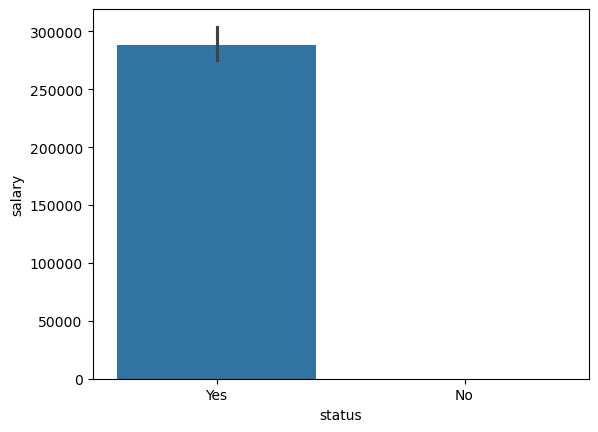

In [331]:
sb.barplot(x='status', y='salary', data=dataset)

### Qual a distribuição de salário para as pessoas contratadas?

<Axes: xlabel='status', ylabel='salary'>

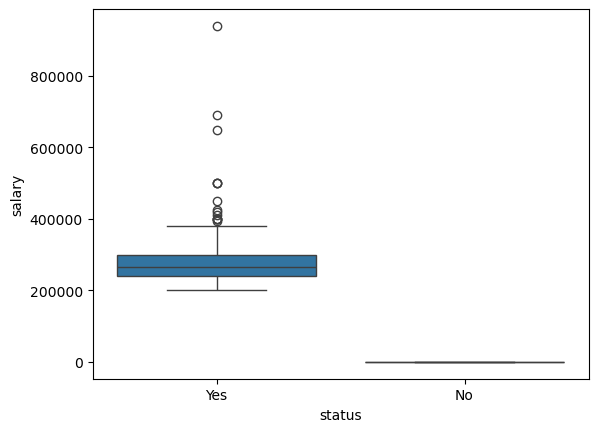

In [332]:
sb.boxplot(x='status', y='salary', data=dataset)

### Qual a variação dos meus dados para atributos de pontuação como degree_p, mba etc para varificação de possíveis outliers?

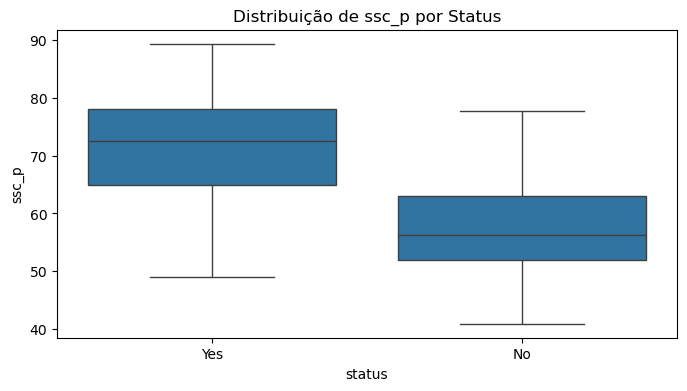

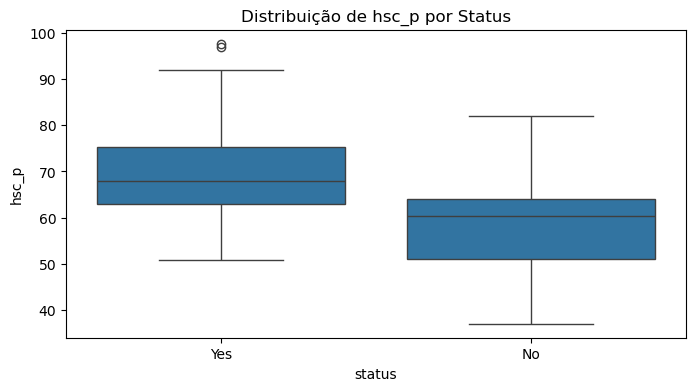

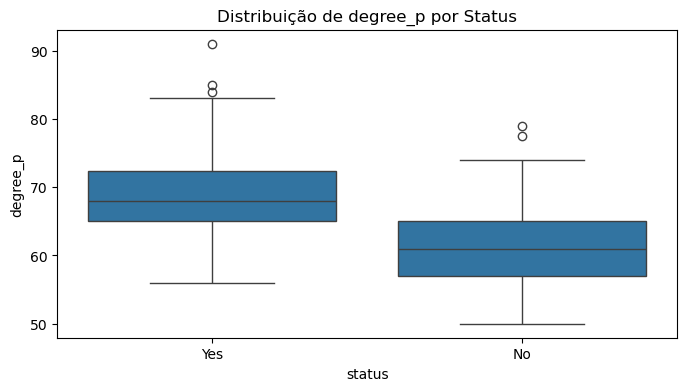

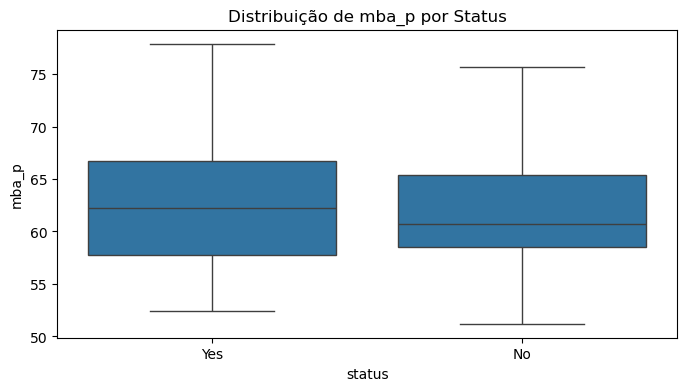

In [333]:
attributes = ['ssc_p', 'hsc_p', 'degree_p', 'mba_p']
for attribute in attributes:
    plt.figure(figsize=(8, 4))
    sb.boxplot(x='status', y=attribute, data=dataset)
    plt.title(f'Distribuição de {attribute} por Status')
    plt.show()


Dessa análise também é possível perceber uma pequena variação de contratação baseada no estudo dos candidatos, principalmente relacionado ao 'Percentual de notas no ensino médio (ssc)' e MBA. Com isso, qual a influencia do nível de escolaridade no momento da contratação?

### Qual a influencia do nível de escolaridade no momento da contratação?

In [334]:
# Calcular médias e medianas para cada atributo por status
attributes = ['ssc_p', 'hsc_p', 'degree_p', 'mba_p']
summary = dataset.groupby('status')[attributes].agg(['mean', 'median'])
print(summary)

            ssc_p             hsc_p          degree_p             mba_p  \
             mean median       mean median       mean median       mean   
status                                                                    
No      57.544030  56.28  58.395522  60.33  61.134179   61.0  61.612836   
Yes     71.721486  72.50  69.926554  68.00  68.740541   68.0  62.579392   

                
        median  
status          
No      60.690  
Yes     62.245  


#### Proporção de candidatos contratados em diferentes faixas de percentuais de notas

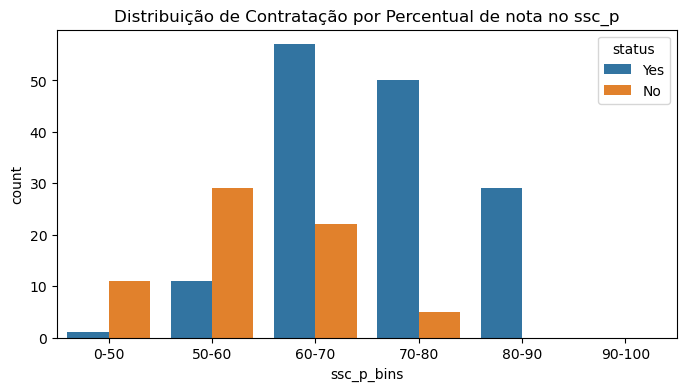

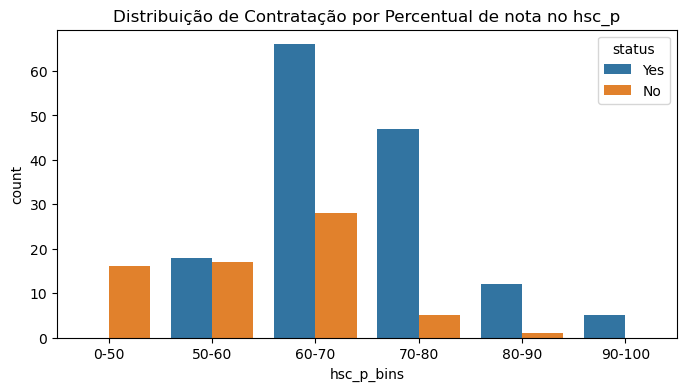

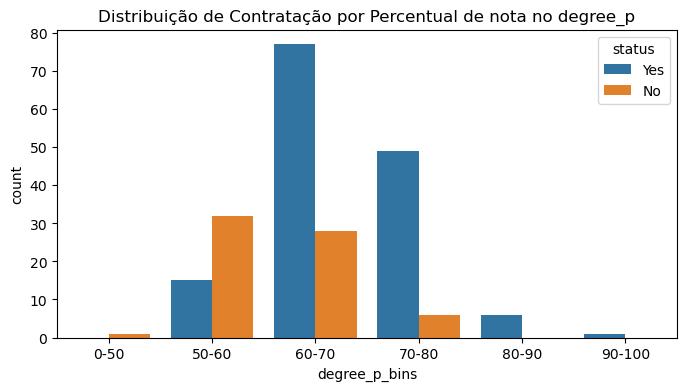

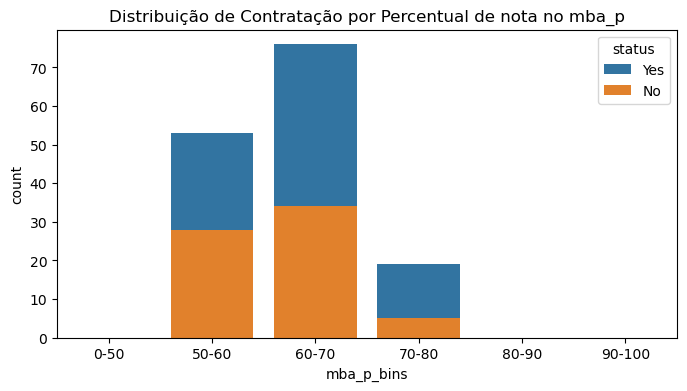

In [335]:
attributes = ['ssc_p', 'hsc_p', 'degree_p', 'mba_p']
for attribute in attributes:
    new_attribute = f'{attribute}_bins'
    dataset[new_attribute] = pd.cut(dataset[attribute], bins=[0, 50, 60, 70, 80, 90, 100], labels=['0-50', '50-60', '60-70', '70-80', '80-90', '90-100'])

    plt.figure(figsize=(8, 4))
    sb.countplot(x=new_attribute, hue='status', data=dataset)
    plt.title(f'Distribuição de Contratação por Percentual de nota no {attribute}')
    plt.show()

### Quantidade de contratados por tipo de escolaridade

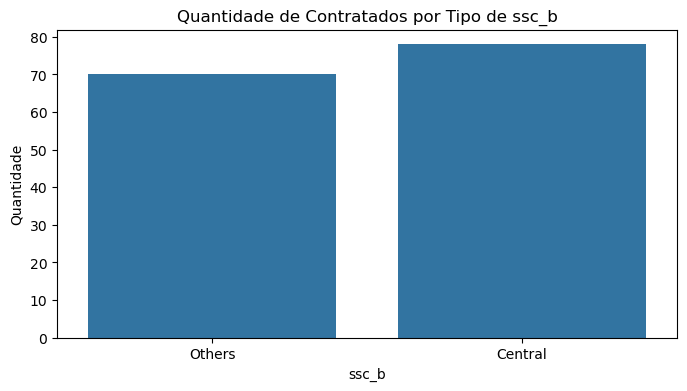

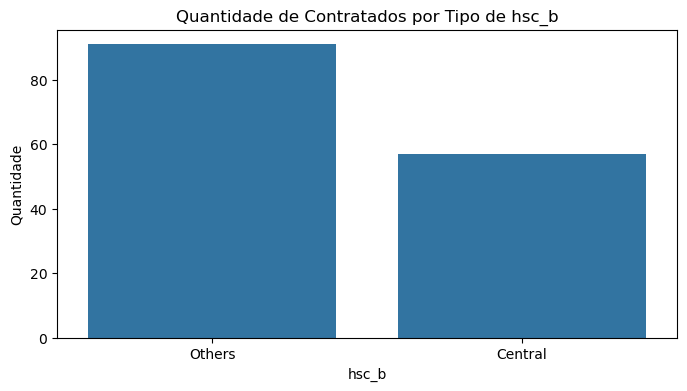

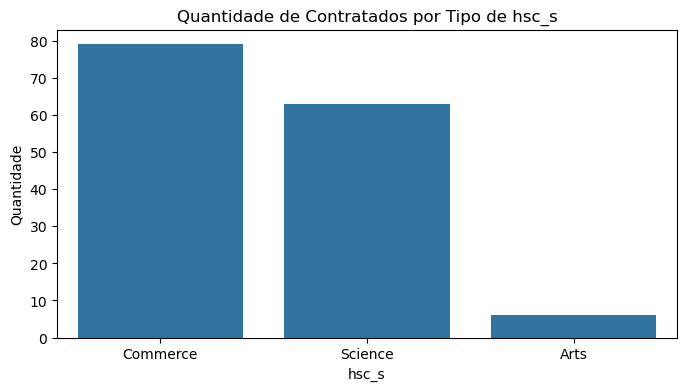

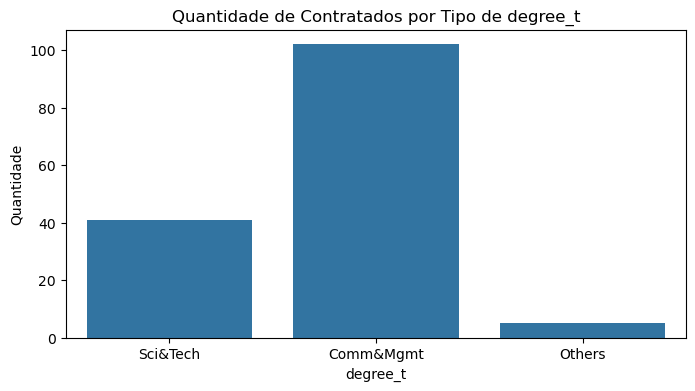

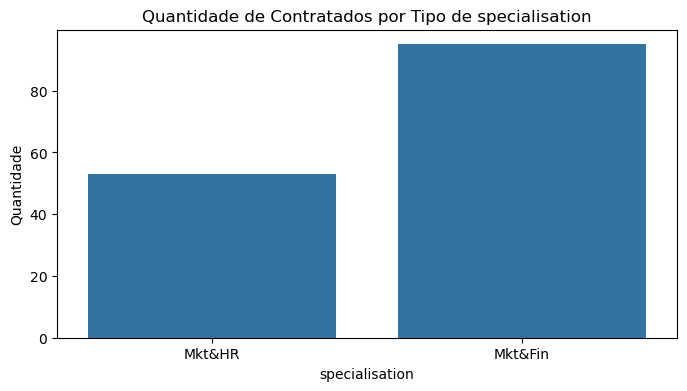

In [336]:
education_columns = ['ssc_b', 'hsc_b', 'hsc_s', 'degree_t', 'specialisation']
for attribute in education_columns:
    plt.figure(figsize=(8, 4))
    sb.countplot(x=attribute, data=dataset[dataset['status'] == 'Yes'])
    plt.title(f"Quantidade de Contratados por Tipo de {attribute}")
    plt.xlabel(attribute)
    plt.ylabel("Quantidade")
    plt.show()


Do conjunto de gráficos é possível observar uma tendência de especialização na área administrativa com tendencia a marketing e finanças. Além disso, dos entrevistados, há uma tendencia de contração para pontuaçoes escolares entre 60 a 80 até a graduação, e um range de pontuação de 60% a 70% para os que fizeram mba

### Dos contratados, qual a variação de genero?

In [337]:
gender_counts = dataset['gender'].value_counts()
print('Quantidade de pessoas por gênero:')
print(gender_counts)

Quantidade de pessoas por gênero:
gender
M    139
F     76
Name: count, dtype: int64


In [338]:
hired_counts = dataset[dataset['status'] == 'Yes']['gender'].value_counts()
print('Quantidade de Contratados por Gênero')
print(hired_counts)

percentage = (hired_counts / gender_counts) * 100
print('Porcentagem de Contratados por Gênero')
print(percentage)

Quantidade de Contratados por Gênero
gender
M    100
F     48
Name: count, dtype: int64
Porcentagem de Contratados por Gênero
gender
M    71.942446
F    63.157895
Name: count, dtype: float64


### Qual o nível de estudo por gênero?

Nível de estudo por gênero (média):
            ssc_p      hsc_p   degree_p      mba_p
gender                                            
F       68.310921  66.646842  68.090000  64.643553
M       66.752518  66.161655  65.429856  60.984892


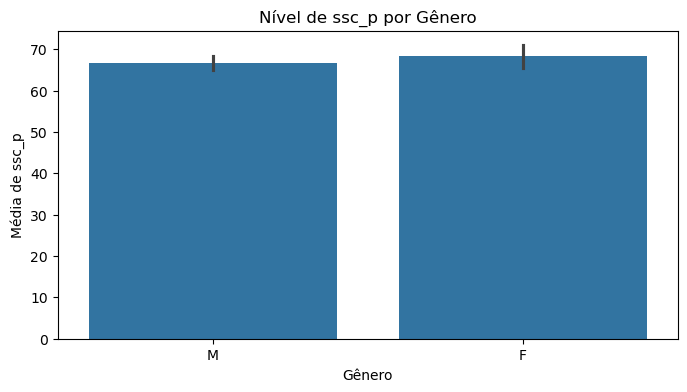

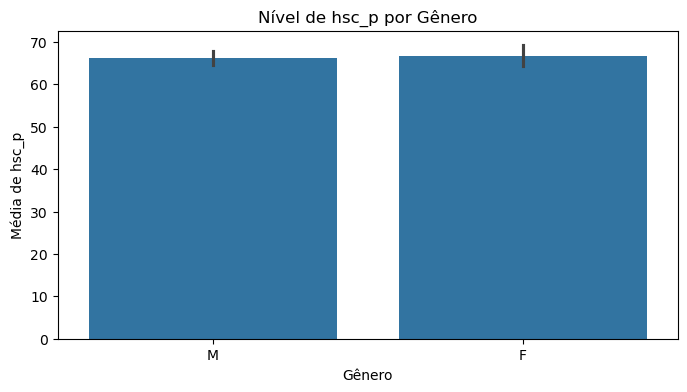

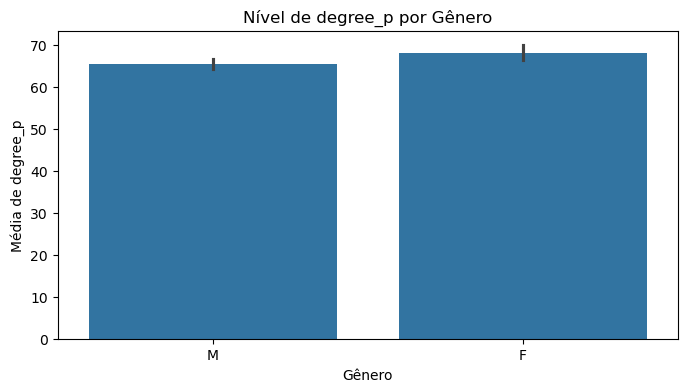

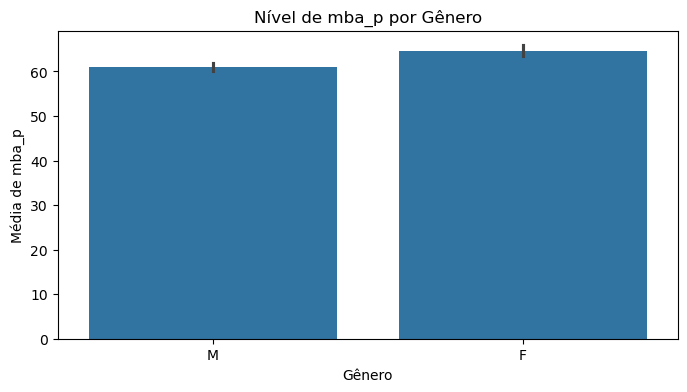

In [339]:
# Agrupar por gênero e calcular a média dos níveis de estudo
study_columns = ['ssc_p', 'hsc_p', 'degree_p', 'mba_p']
study_by_gender = dataset.groupby('gender')[study_columns].mean()

print("Nível de estudo por gênero (média):")
print(study_by_gender)

for column in study_columns:
    plt.figure(figsize=(8, 4))
    sb.barplot(x='gender', y=column, data=dataset)
    plt.title(f"Nível de {column} por Gênero")
    plt.xlabel("Gênero")
    plt.ylabel(f"Média de {column}")
    plt.show()

### Quais variáveis influenciam mais na contratação?

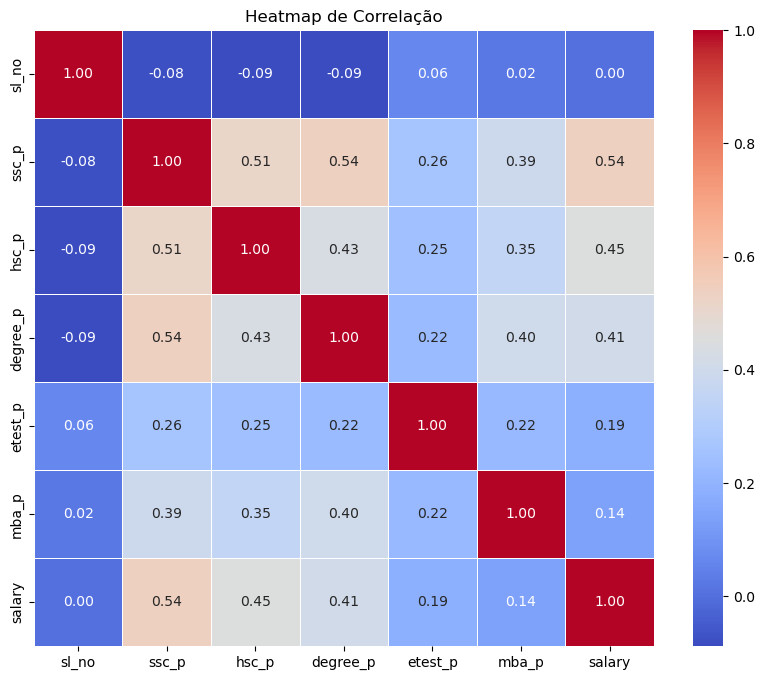

In [340]:
# Selecionar apenas colunas numéricas
numeric_columns = dataset.select_dtypes(include=['float64', 'int64'])

# Calcular a matriz de correlação
correlation_matrix = numeric_columns.corr()

# Criar a heatmap
plt.figure(figsize=(10, 8))
sb.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title("Heatmap de Correlação")
plt.show()

### Tratamento de dados categóricos

In [341]:
binary_features = ['gender', 'ssc_b', 'hsc_b', 'workex', 'status']
label_encoder = LabelEncoder()
for feature in binary_features:
    dataset[feature] = label_encoder.fit_transform(dataset[feature])

dataset.head()

,sl_no,gender,ssc_p,ssc_b,hsc_p,hsc_b,hsc_s,degree_p,degree_t,workex,etest_p,specialisation,mba_p,status,salary,ssc_p_bins,hsc_p_bins,degree_p_bins,mba_p_bins
0,1,1,67.00,1,91.00,1,Commerce,58.00,Sci&Tech,0,55.0,Mkt&HR,58.80,1,270000.0,60-70,90-100,50-60,50-60
1,2,1,79.33,0,78.33,1,Science,77.48,Sci&Tech,1,86.5,Mkt&Fin,66.28,1,200000.0,70-80,70-80,70-80,60-70
2,3,1,65.00,0,68.00,0,Arts,64.00,Comm&Mgmt,0,75.0,Mkt&Fin,57.80,1,250000.0,60-70,60-70,60-70,50-60
3,4,1,56.00,0,52.00,0,Science,52.00,Sci&Tech,0,66.0,Mkt&HR,59.43,0,0.0,50-60,50-60,50-60,50-60
4,5,1,85.80,0,73.60,0,Commerce,73.30,Comm&Mgmt,0,96.8,Mkt&Fin,55.50,1,425000.0,80-90,70-80,70-80,50-60


### Mapa de calor para avaliação da correlação dos dados após o tratamento de variáveis categóricas

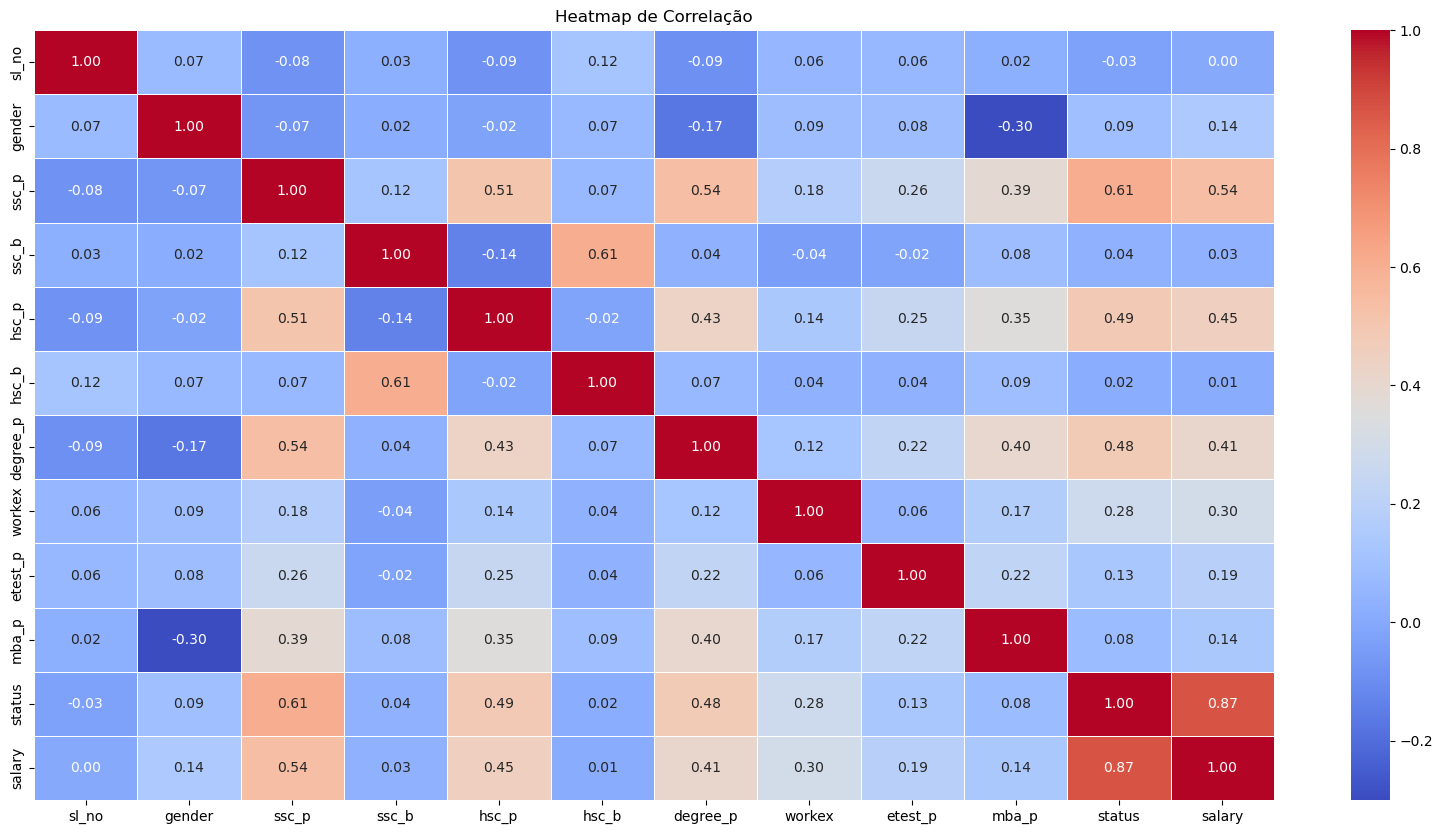

In [342]:
# Selecionar apenas colunas numéricas
numeric_columns = dataset.select_dtypes(include=['float64', 'int64'])

# Calcular a matriz de correlação
correlation_matrix = numeric_columns.corr()

# Criar a heatmap
plt.figure(figsize=(20, 10))
sb.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title("Heatmap de Correlação")
plt.show()

Do mapa de calor anterior ao tratamento de dados das outras variáveis categoricas, as variáveis que mais interferem a contratação são degree_p, hsc_p e ssc_p, variáveis essas relacionadas ao nível de escolaridade. Além dessas, também há a variável workex.

Contudo, a variável que mais interfere na contratação, pelo mapa de calor, é a variável ssc_p.

O salário não é considerado na análise uma vez que só recebem salários os que foram efetivamente contratados.

In [343]:
categorical_features = ['hsc_s', 'degree_t', 'specialisation']
one_hot_encoder = OneHotEncoder(sparse_output=False)
encoded_features = one_hot_encoder.fit_transform(dataset[categorical_features])
encoded_features_df = pd.DataFrame(encoded_features, columns=one_hot_encoder.get_feature_names_out(categorical_features))
dataset = pd.concat([dataset, encoded_features_df], axis=1)
dataset.head()

,sl_no,gender,ssc_p,ssc_b,hsc_p,hsc_b,hsc_s,degree_p,degree_t,workex,...,degree_p_bins,mba_p_bins,hsc_s_Arts,hsc_s_Commerce,hsc_s_Science,degree_t_Comm&Mgmt,degree_t_Others,degree_t_Sci&Tech,specialisation_Mkt&Fin,specialisation_Mkt&HR
0,1,1,67.00,1,91.00,1,Commerce,58.00,Sci&Tech,0,...,50-60,50-60,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0
1,2,1,79.33,0,78.33,1,Science,77.48,Sci&Tech,1,...,70-80,60-70,0.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0
2,3,1,65.00,0,68.00,0,Arts,64.00,Comm&Mgmt,0,...,60-70,50-60,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
3,4,1,56.00,0,52.00,0,Science,52.00,Sci&Tech,0,...,50-60,50-60,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0
4,5,1,85.80,0,73.60,0,Commerce,73.30,Comm&Mgmt,0,...,70-80,50-60,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0


### Trenamento de um modelo de regressão considerando as variáveis com maior influência na contratação